In [1]:
from data_preprocess import preprocess
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
import math

In [2]:
df_data = preprocess()

/home/changliu020/anaconda3/envs/ece143/lib/python3.10/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13772 entries, 0 to 13771
Columns: 221 entries, SEQN to SERIOUS_01
dtypes: category(30), float64(187), int64(4)
memory usage: 20.6 MB


In [4]:
df_data

,SEQN,WTDRD1PP,WTDR2DPP,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,TOTAL_CARIES_COUNT,ANTERIOR_DENTAL_SEALANT_COUNT,POSTERIOR_DENTAL_SEALANT_COUNT,TOTAL_SEALANT_COUNT,ROOT_CARIES,OTHER_NON_CARIOUS_ROOT_LESION,ANTERIOR_SIMPLE_01,POSTERIOR_SIMPLE_01,TOTAL_SIMPLE_01,SERIOUS_01
0,109263.0,7.619484e+03,1.780807e+04,1.0,14.0,2.0,2.0,4.000000e+00,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,109264.0,8.235896e+03,7.253762e+03,1.0,81.0,2.0,2.0,5.000000e+00,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,109265.0,3.353508e+04,3.561201e+04,1.0,88.0,2.0,2.0,1.900000e+01,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,109266.0,6.831068e+03,5.988204e+03,1.0,81.0,2.0,2.0,4.000000e+00,7.0,1.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1
4,109269.0,7.875707e+03,1.823193e+04,1.0,88.0,2.0,2.0,9.000000e+00,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,124818.0,1.546208e+04,1.243740e+04,1.0,49.0,2.0,2.0,6.000000e+00,7.0,1.0,...,21.0,0.0,0.0,0.0,1.0,0.0,1,1,1,1
13768,124819.0,4.091615e+03,4.100758e+03,1.0,14.0,2.0,2.0,2.200000e+01,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
13769,124820.0,3.435783e+04,3.505186e+04,1.0,86.0,2.0,2.0,1.800000e+01,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
13770,124821.0,3.043724e+03,5.397605e-79,1.0,81.0,2.0,1.0,5.397605e-79,7.0,1.0,...,25.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1


In [5]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

In [6]:
X = normalization(df_data.loc[:, 'WTDRD1PP':'DSQTIODI'].to_numpy())
# TODO: scale to [0, 1]

In [11]:
df_data.columns[-20:]

Index(['DSQTSODI', 'DSQTPOTA', 'DSQTSELE', 'DSQTCAFF', 'DSQTIODI',
       'ANTERIOR_TOOTH_COUNT', 'POSTERIOR_TOOTH_COUNT', 'TOTAL_TOOTH_COUNT',
       'ANTERIOR_CARIES_COUNT', 'POSTERIOR_CARIES_COUNT', 'TOTAL_CARIES_COUNT',
       'ANTERIOR_DENTAL_SEALANT_COUNT', 'POSTERIOR_DENTAL_SEALANT_COUNT',
       'TOTAL_SEALANT_COUNT', 'ROOT_CARIES', 'OTHER_NON_CARIOUS_ROOT_LESION',
       'ANTERIOR_SIMPLE_01', 'POSTERIOR_SIMPLE_01', 'TOTAL_SIMPLE_01',
       'SERIOUS_01'],
      dtype='object')

TOTAL_TOOTH_COUNT [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


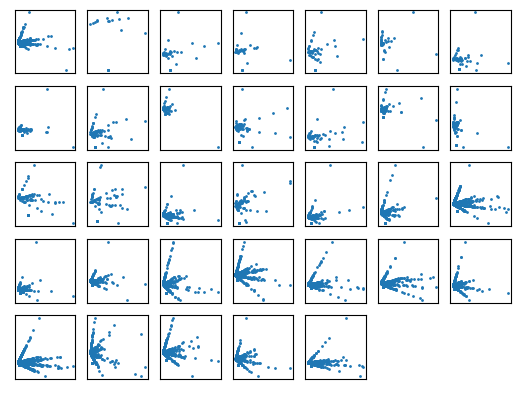

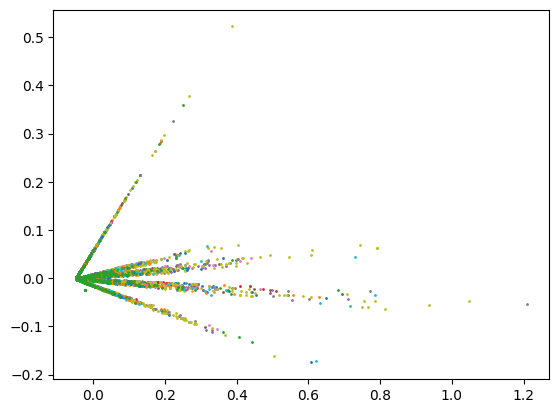

In [14]:
for attr_y in ['TOTAL_TOOTH_COUNT']:
    y = df_data.loc[:, attr_y].to_numpy()  # change to see if label work
    print(attr_y, np.unique(y))

    pca_model = decomposition.PCA(n_components=2)
    pca_model.fit(X)
    X_t = pca_model.transform(X)

    X_group_by_y = []
    for y_i in np.unique(y):
        X_group_by_y.append([])
        
    for i, y_i in enumerate(np.unique(y)):
        X_group_by_y[i] = X_t[np.where(y == y_i)]

    cols = min(7, np.unique(y).shape[0])
    rows = math.ceil(np.unique(y).shape[0] / cols)

    for i, y_i in enumerate(np.unique(y)):
        X_i = X_group_by_y[i]
        plt.subplot(rows, cols, i+1)
        plt.scatter(X_i[:, 0], X_i[:, 1], s=1)
        plt.xticks([])
        plt.yticks([])
    plt.show()

    for i, y_i in enumerate(np.unique(y)):
        X_i = X_group_by_y[i]
        plt.scatter(X_i[:, 0], X_i[:, 1], s=1)
    plt.show()